In [1]:
import shutil
import os

shutil.copy2('./measdata/Simple_Flip_emulator_result.csv', 
             './measdata/State1.csv')
shutil.copy2('./measdata/Simple_Identity_emulator_result.csv', 
             './measdata/State0.csv')

'./measdata/State0.csv'

Loading historical data from measdata/Post_Full_Current.json...
Loaded 8192 shots for State 0.
Loaded 8192 shots for State 1.

--- Starting Calibration ---
Calibrating |0> state...
   Using 8192 shots split into 16 points for KDE.
Inferring Qubit 1 for State |0>
Given Lambda |0>: prior success rate = 0.9330


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


<Figure size 640x480 with 0 Axes>

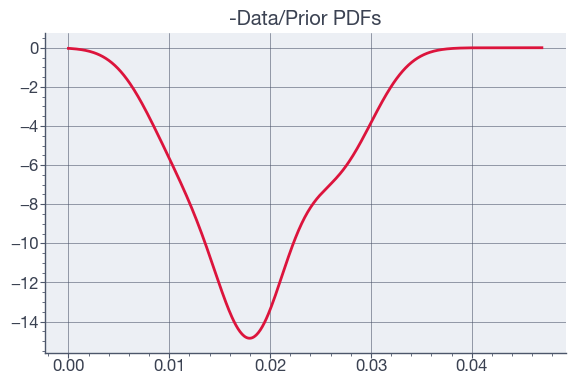

   Accepted N: 2773 (6.9%)
Inferring Qubit 2 for State |0>
Given Lambda |0>: prior success rate = 0.9050


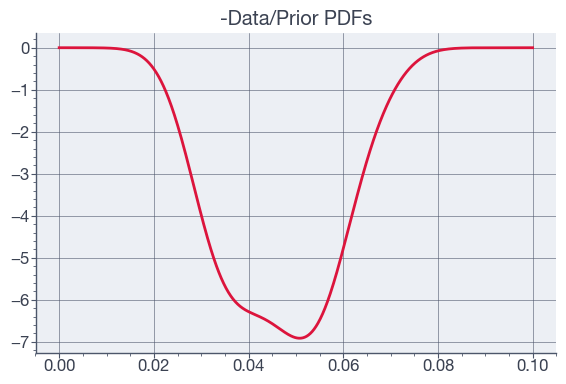

   Accepted N: 5770 (14.4%)
Inferring Qubit 3 for State |0>
Given Lambda |0>: prior success rate = 0.9650


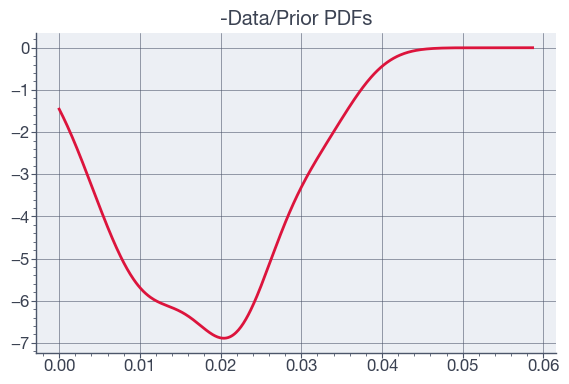

   Accepted N: 6146 (15.4%)
Inference Complete, Saving Results...
Saved Full Posterior to:
measdata/Post_Full_20260119_112634.json
and
measdata/Post_Full_Current.json
Saved Mean/Mode Summary to:
measdata/Post_MeanMode_20260119_112634.json
and
measdata/Post_MeanMode_Current.json


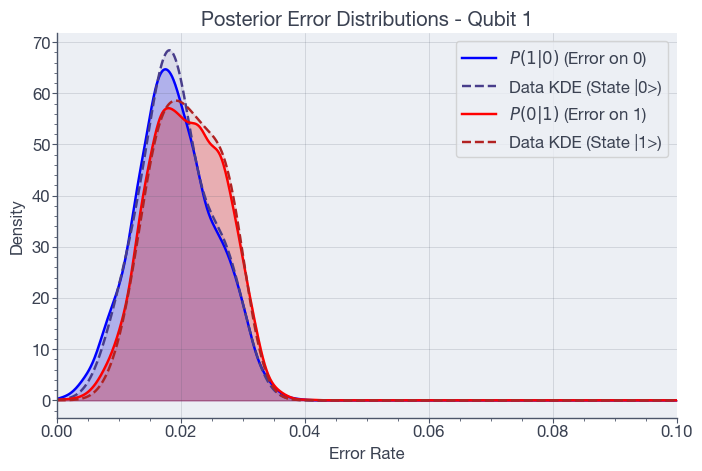

--- Qubit 1 Summary ---
Error on |0>: 0.0191 (95% CI: 0.0073 - 0.0312)
Error on |1>: 0.0209 (95% CI: 0.0096 - 0.0320)
------------------------------


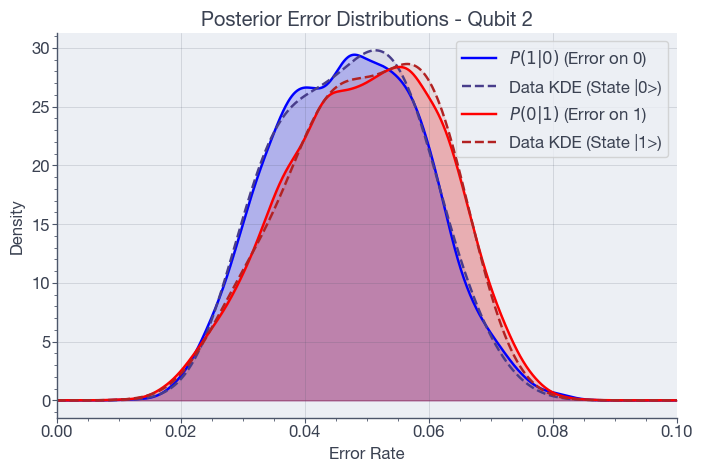

--- Qubit 2 Summary ---
Error on |0>: 0.0471 (95% CI: 0.0251 - 0.0702)
Error on |1>: 0.0496 (95% CI: 0.0247 - 0.0717)
------------------------------


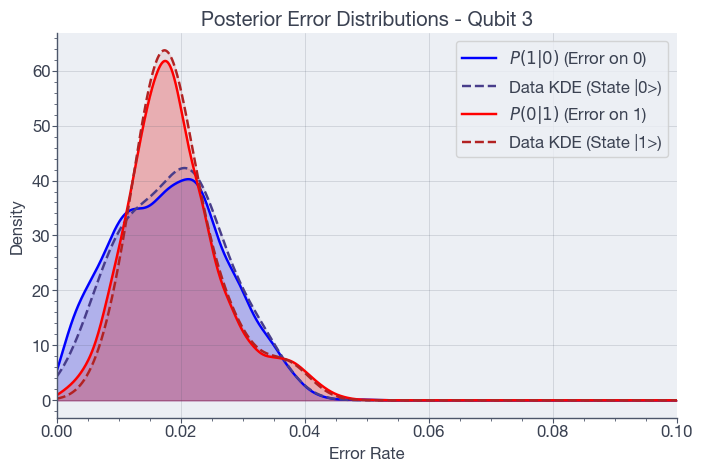

--- Qubit 3 Summary ---
Error on |0>: 0.0183 (95% CI: 0.0023 - 0.0359)
Error on |1>: 0.0192 (95% CI: 0.0061 - 0.0384)
------------------------------
Calibrating |1> state...
   Using 8192 shots split into 16 points for KDE.
Inferring Qubit 1 for State |1>
Given Lambda |1>: prior success rate = 0.9280


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


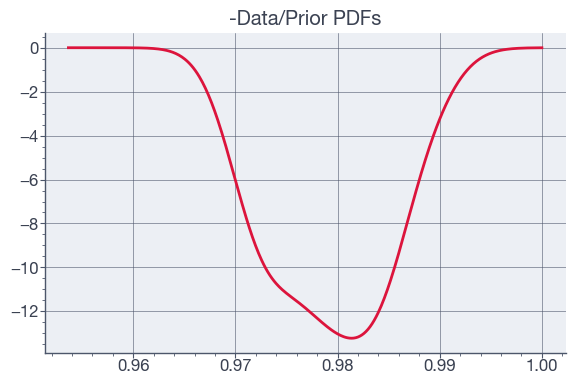

   Accepted N: 3084 (7.7%)
Inferring Qubit 2 for State |1>
Given Lambda |1>: prior success rate = 0.9150


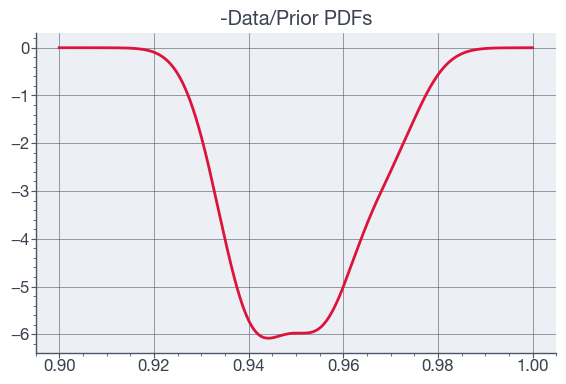

   Accepted N: 6581 (16.5%)
Inferring Qubit 3 for State |1>
Given Lambda |1>: prior success rate = 0.9950


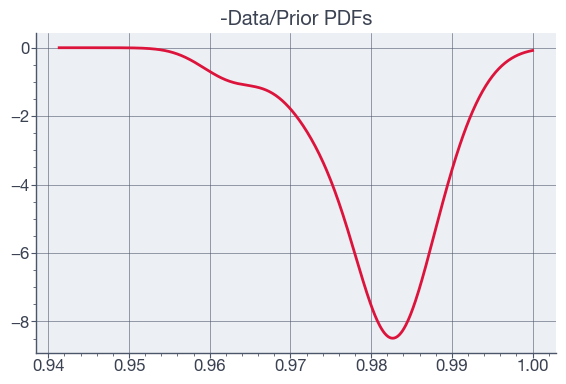

   Accepted N: 4897 (12.2%)
Inference Complete, Saving Results...
Saved Full Posterior to:
measdata/Post_Full_20260119_112708.json
and
measdata/Post_Full_Current.json
Saved Mean/Mode Summary to:
measdata/Post_MeanMode_20260119_112708.json
and
measdata/Post_MeanMode_Current.json


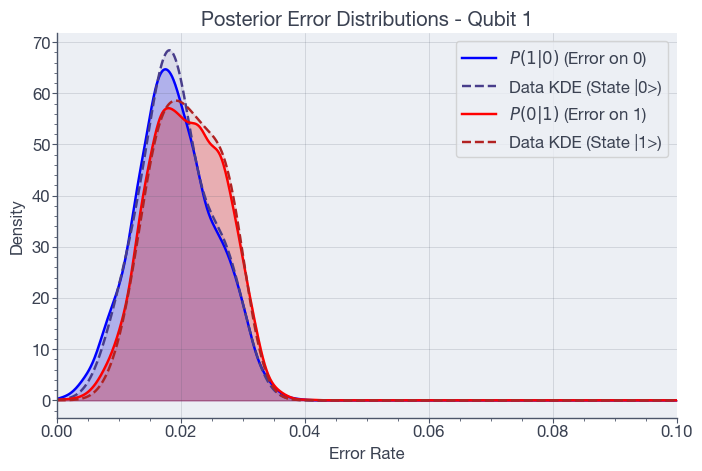

--- Qubit 1 Summary ---
Error on |0>: 0.0191 (95% CI: 0.0073 - 0.0312)
Error on |1>: 0.0209 (95% CI: 0.0096 - 0.0320)
------------------------------


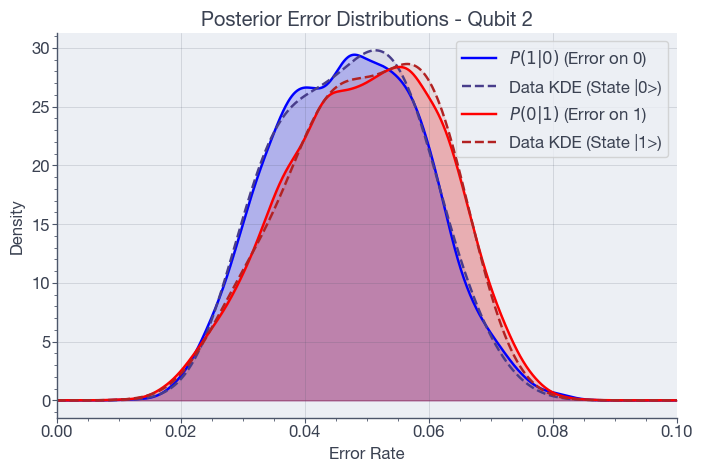

--- Qubit 2 Summary ---
Error on |0>: 0.0471 (95% CI: 0.0251 - 0.0702)
Error on |1>: 0.0496 (95% CI: 0.0247 - 0.0717)
------------------------------


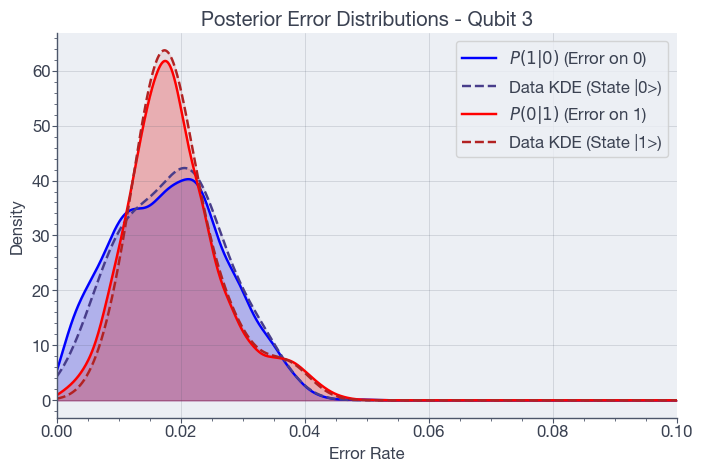

--- Qubit 3 Summary ---
Error on |0>: 0.0183 (95% CI: 0.0023 - 0.0359)
Error on |1>: 0.0192 (95% CI: 0.0061 - 0.0384)
------------------------------
Inference Complete.


In [2]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='measdata/')

print("\n--- Starting Calibration ---")

## providing the true errors which I used to simulate the data in samples/CZ_test.ipynb
my_filter.params = {
    'Qubit1': {'err0': 0.067, 'err1': 0.072},
    'Qubit2': {'err0': 0.095, 'err1': 0.085},
    'Qubit3': {'err0': 0.035, 'err1': 0.005}
}

# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.inference(num_points = 16, prep_state='0', nPrior=40000, prior_sd= 0.1)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.inference(num_points = 16,prep_state='1', nPrior=40000, prior_sd= 0.1)

print("Inference Complete.")

Loading history from gatedata/Post_Gate_Full_Current.json...
measdata/Post_Full_Current.json File loaded successfully!
Beginning Inference Run. Circuit index used: 0.
--- Inferring Gate Errors for Qubit 1 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 8.74496e-322
-> Inferred 1788 samples for QubitQubit1 (Single)
Accepted Number N: 1788, fraction 0.045
I(pi^post_Lambda) = 1
Posterior Lambda Mean [9.81153907e-01 9.81609962e-01 3.35366339e-04]
Posterior Lambda Mode [9.82551428e-01 9.83140262e-01 1.25283423e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.668384
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


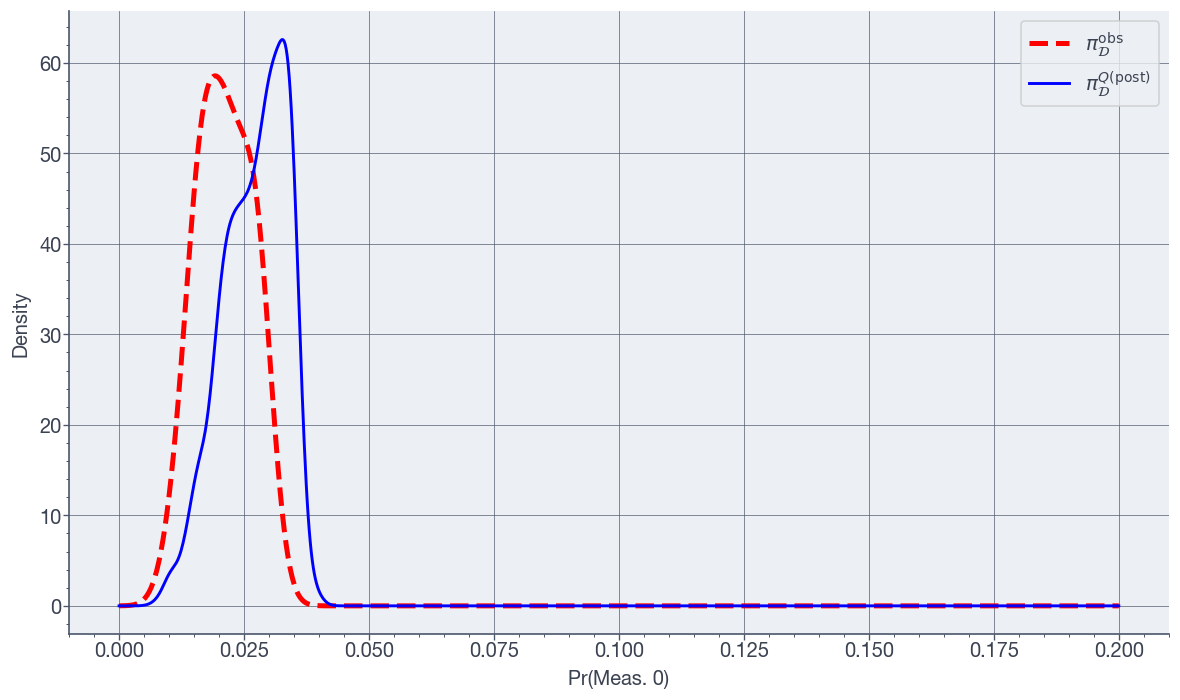

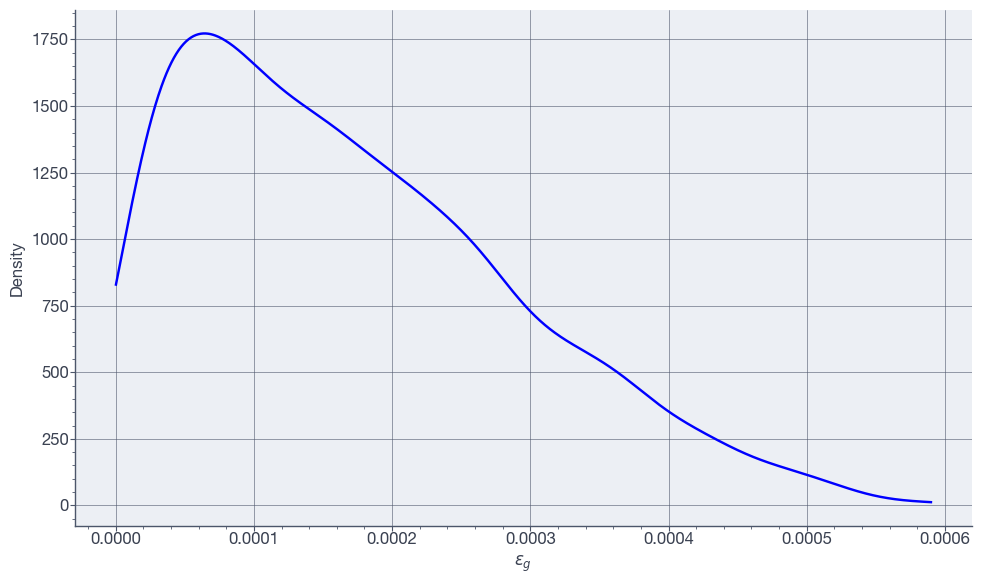

--- Inferring Gate Errors for Qubit 2 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 8.20149e-322
-> Inferred 3315 samples for QubitQubit2 (Single)
Accepted Number N: 3315, fraction 0.083
I(pi^post_Lambda) = 1
Posterior Lambda Mean [9.52857255e-01 9.56074469e-01 6.43029835e-04]
Posterior Lambda Mode [9.55591240e-01 9.56427659e-01 4.60791972e-05]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.579279
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


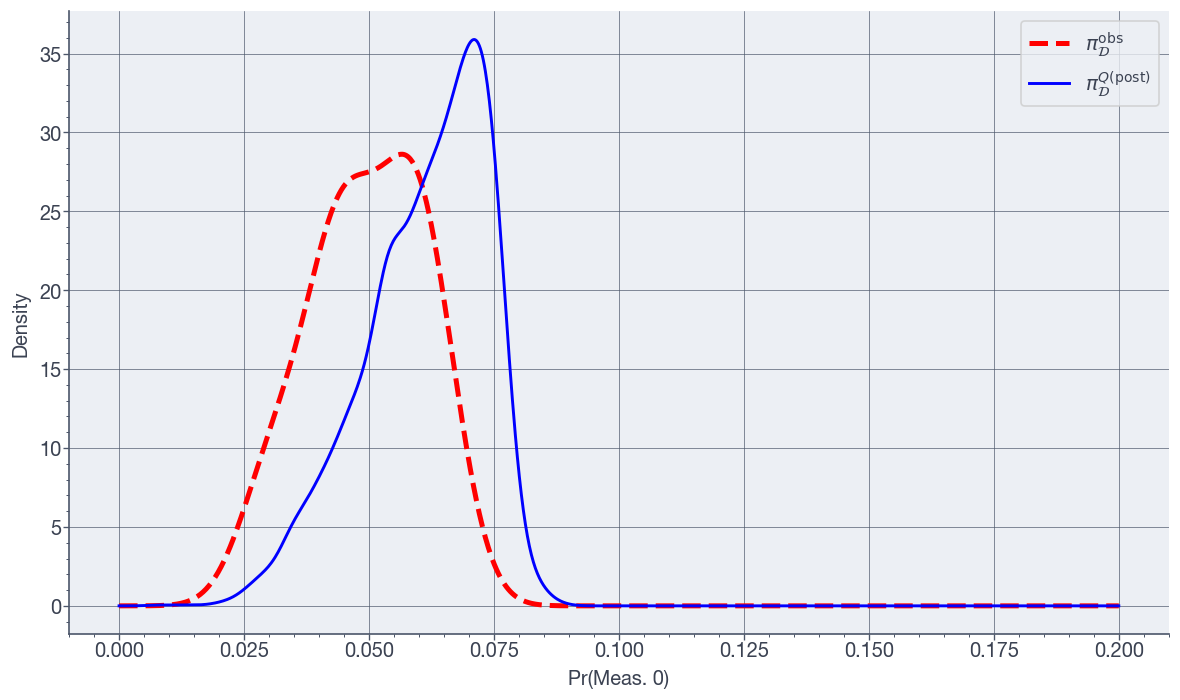

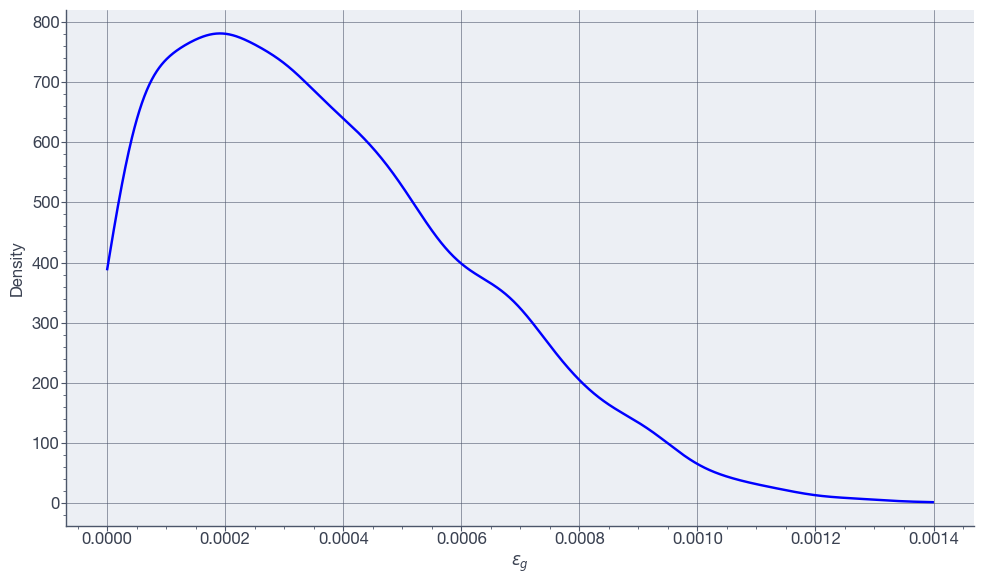

--- Inferring Gate Errors for Qubit 3 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 1.70525e-307
-> Inferred 2760 samples for QubitQubit3 (Single)
Accepted Number N: 2760, fraction 0.069
I(pi^post_Lambda) = 0.99974
Posterior Lambda Mean [9.82002659e-01 9.83607085e-01 5.55908203e-04]
Posterior Lambda Mode [9.78338921e-01 9.83849726e-01 4.45871607e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.866044
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


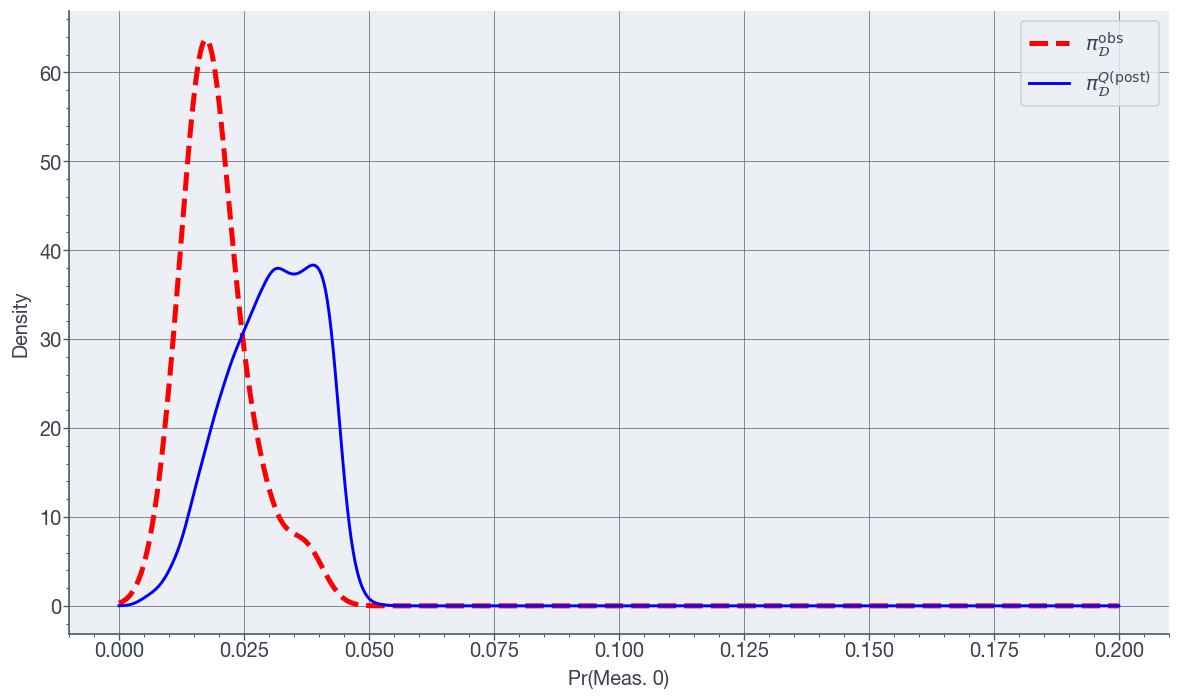

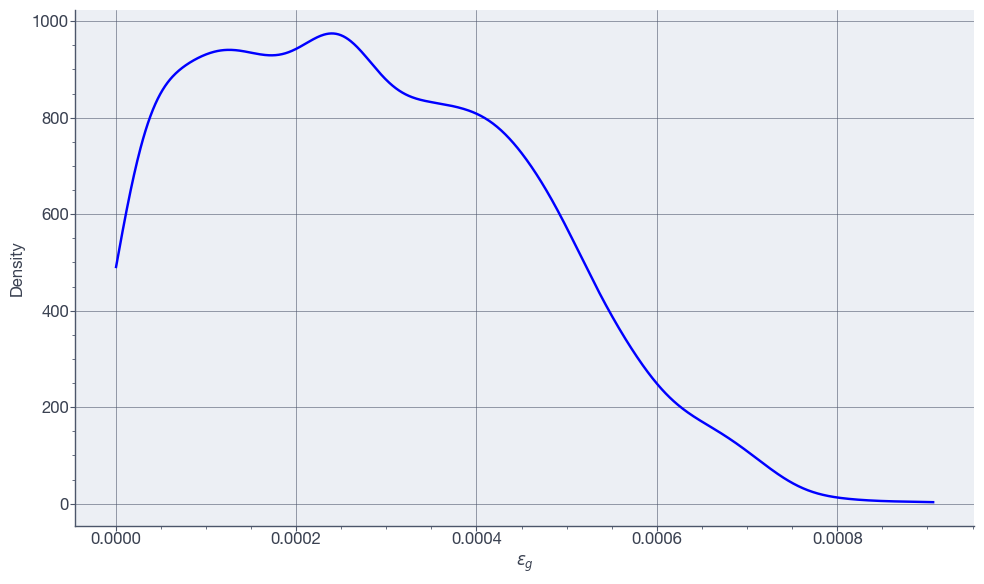

Saved Full Gate Posterior to:
gatedata/Post_Gate_Full_20260119_135320.json
and
gatedata/Post_Gate_Full_Current.json
Saved Mean/Mode Gate Summary to:
gatedata/Post_Gate_MeanMode_20260119_135320.json
and
gatedata/Post_Gate_MeanMode_Current.json
Beginning Inference Run. Circuit index used: 1.
--- Inferring Gate Errors for Qubit 1 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 1.80019e-311
-> Inferred 1759 samples for QubitQubit1 (Single)
Accepted Number N: 1759, fraction 0.044
I(pi^post_Lambda) = 1
Posterior Lambda Mean [9.81060542e-01 9.81579212e-01 3.08093962e-04]
Posterior Lambda Mode [9.83155611e-01 9.83168919e-01 3.13990272e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.706045
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


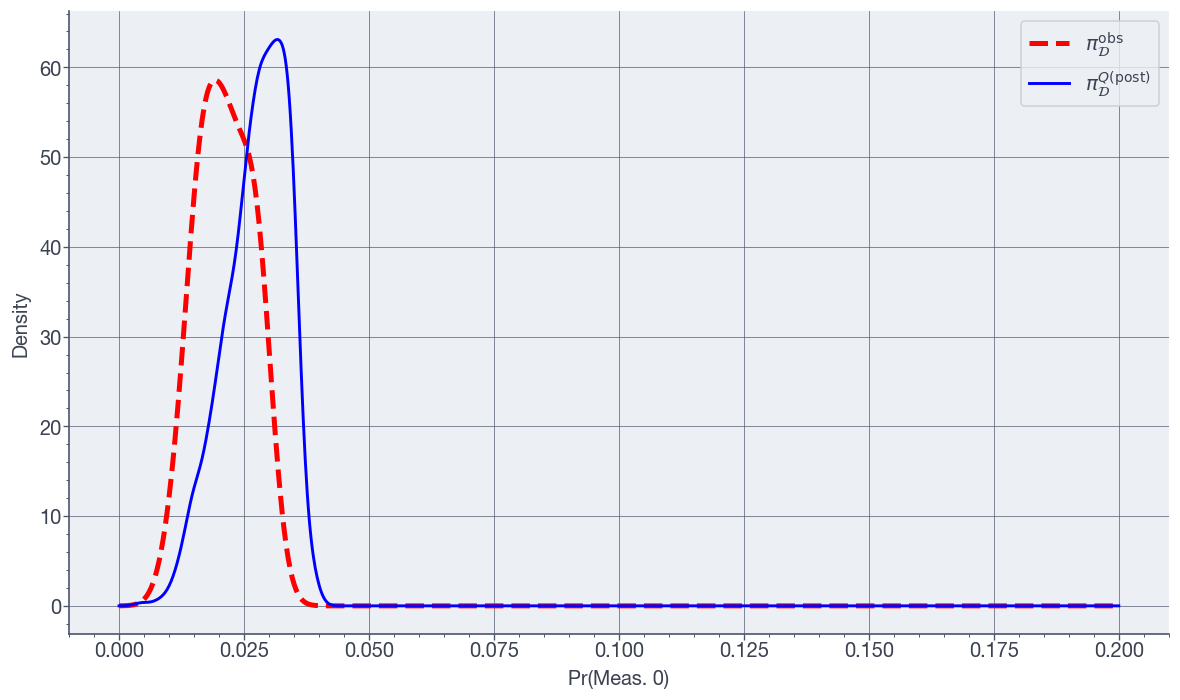

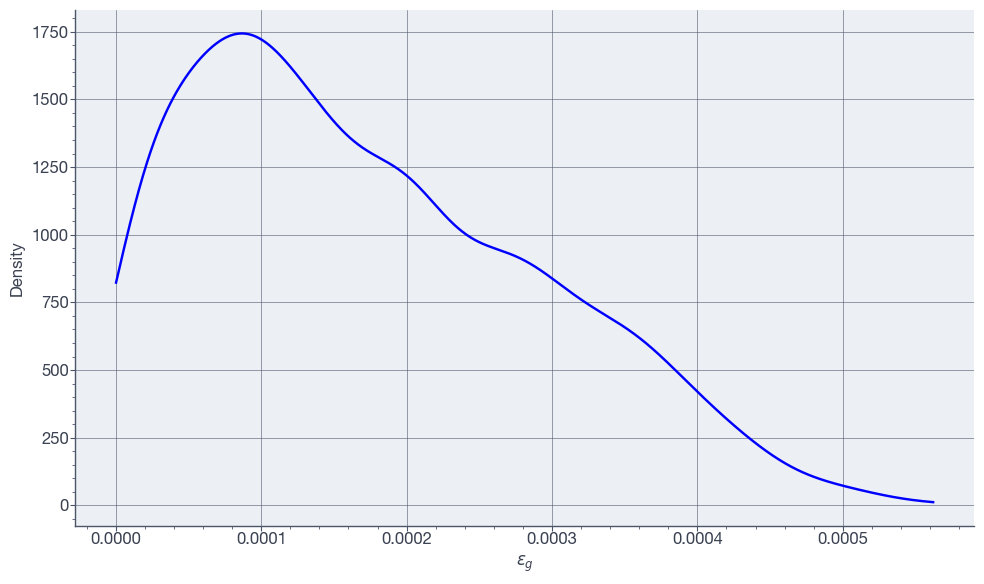

--- Inferring Gate Errors for Qubit 2 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.5 pi_obs = 0 pi_Q(prior) = 0.000116744
-> Inferred 3306 samples for QubitQubit2 (Single)
Accepted Number N: 3306, fraction 0.083
I(pi^post_Lambda) = 1
Posterior Lambda Mean [9.53094459e-01 9.55604064e-01 5.36770711e-04]
Posterior Lambda Mode [9.52859533e-01 9.56663829e-01 4.60248901e-07]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.532406
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


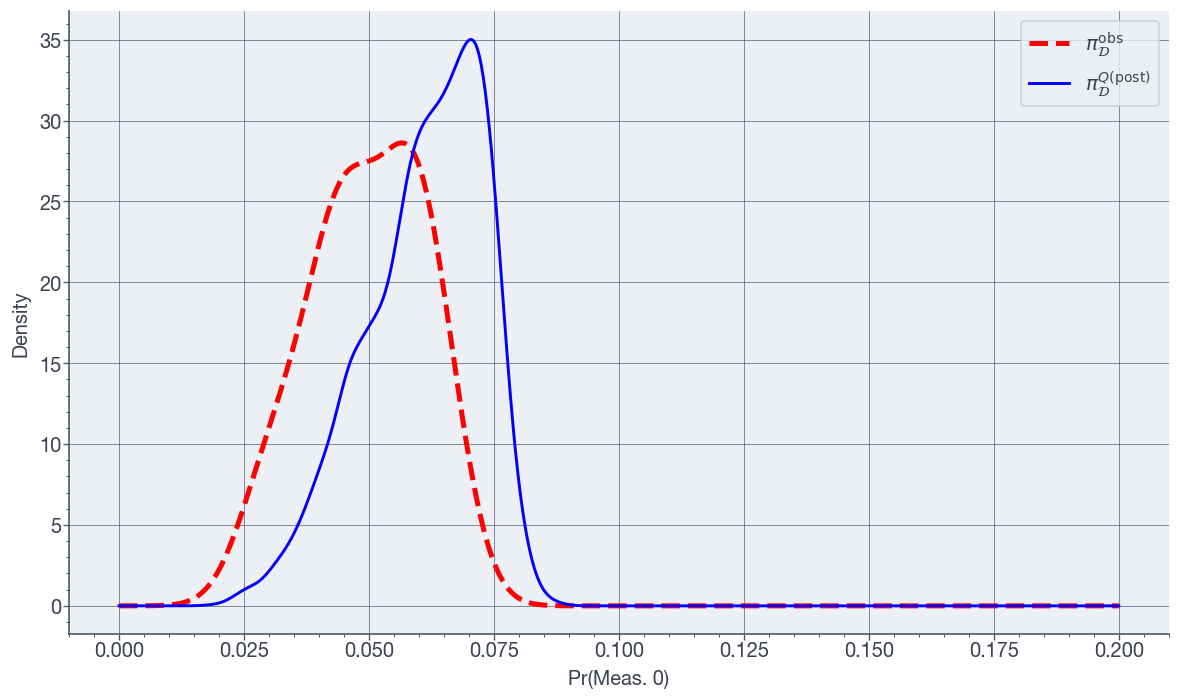

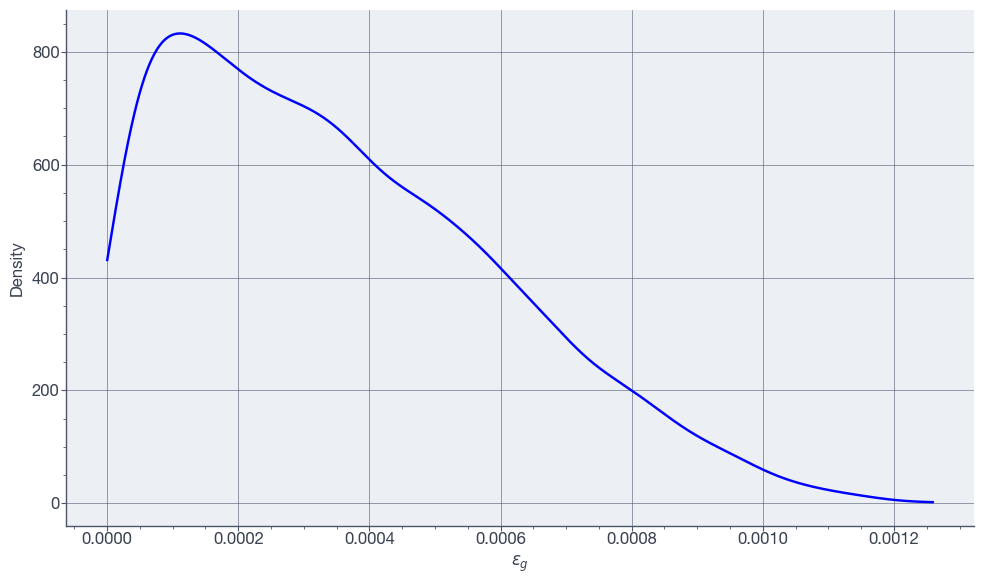

--- Inferring Gate Errors for Qubit 3 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 4.20044e-305
-> Inferred 2885 samples for QubitQubit3 (Single)
Accepted Number N: 2885, fraction 0.072
I(pi^post_Lambda) = 0.99974
Posterior Lambda Mean [9.81099133e-01 9.83796698e-01 7.35935065e-04]
Posterior Lambda Mode [9.80445738e-01 9.84017789e-01 5.27909336e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.867394
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


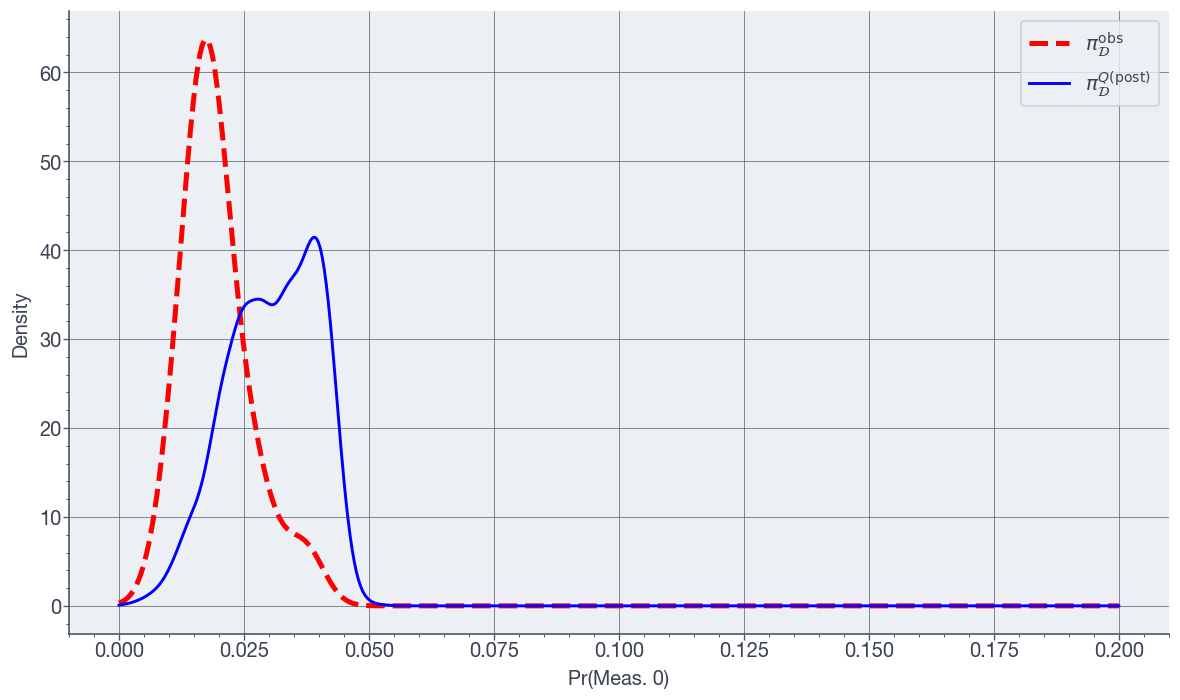

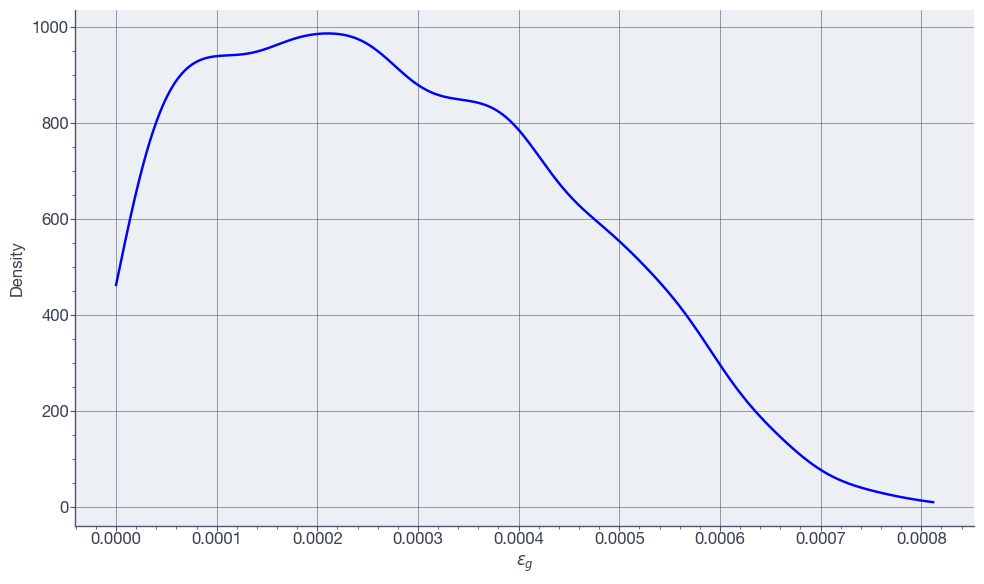

Saved Full Gate Posterior to:
gatedata/Post_Gate_Full_20260119_135352.json
and
gatedata/Post_Gate_Full_Current.json
Saved Mean/Mode Gate Summary to:
gatedata/Post_Gate_MeanMode_20260119_135352.json
and
gatedata/Post_Gate_MeanMode_Current.json
Beginning Inference Run. Circuit index used: 2.
--- Inferring Gate Errors for Qubit 1 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 2.77758e-318
-> Inferred 1667 samples for QubitQubit1 (Single)
Accepted Number N: 1667, fraction 0.042
I(pi^post_Lambda) = 1
Posterior Lambda Mean [9.80879347e-01 9.81939319e-01 2.57158199e-04]
Posterior Lambda Mode [9.81422617e-01 9.82896250e-01 2.71417859e-05]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.680379
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


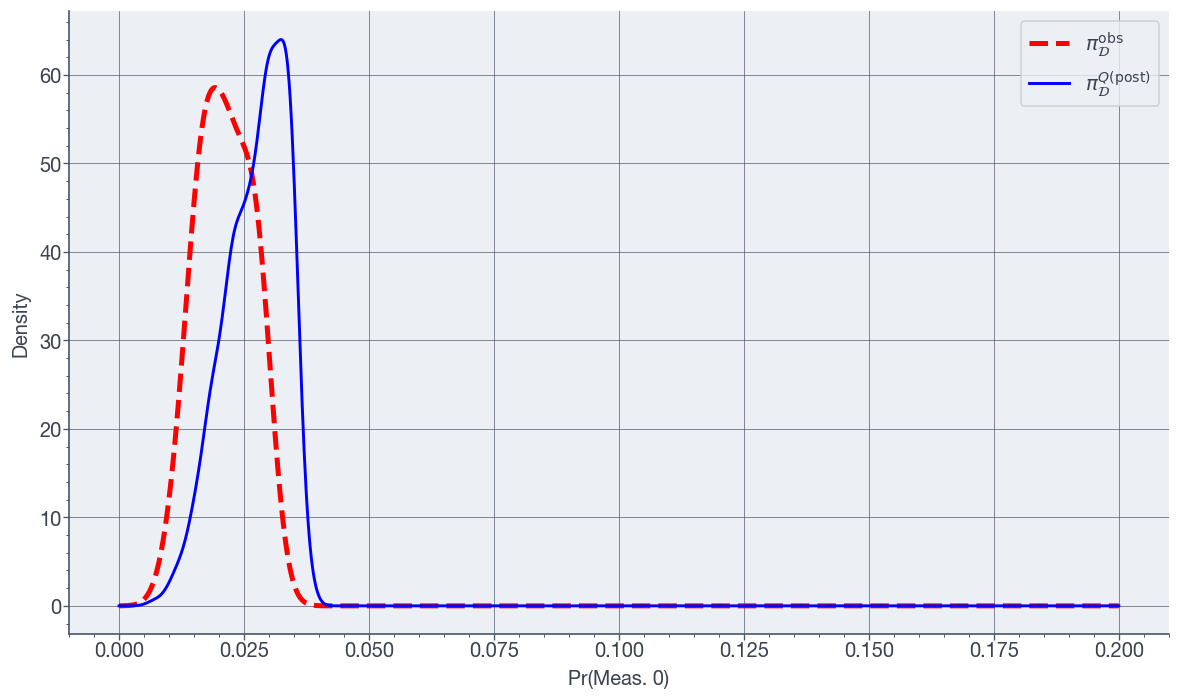

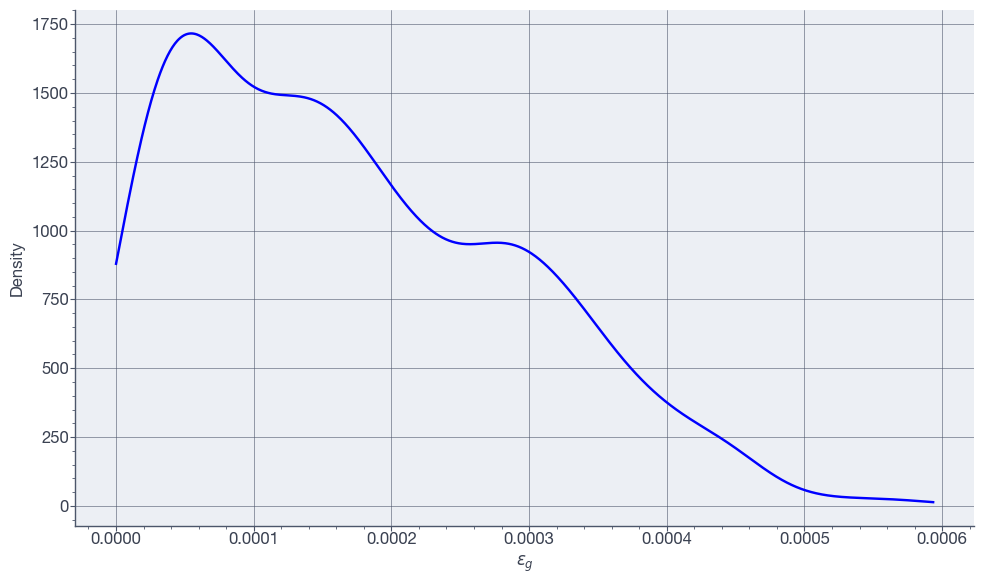

--- Inferring Gate Errors for Qubit 2 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.5 pi_obs = 0 pi_Q(prior) = 7.13387e-06
-> Inferred 3366 samples for QubitQubit2 (Single)
Accepted Number N: 3366, fraction 0.084
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.95322371 0.95551483 0.00105955]
Posterior Lambda Mode [9.56698331e-01 9.55860416e-01 1.58882608e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.542628
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


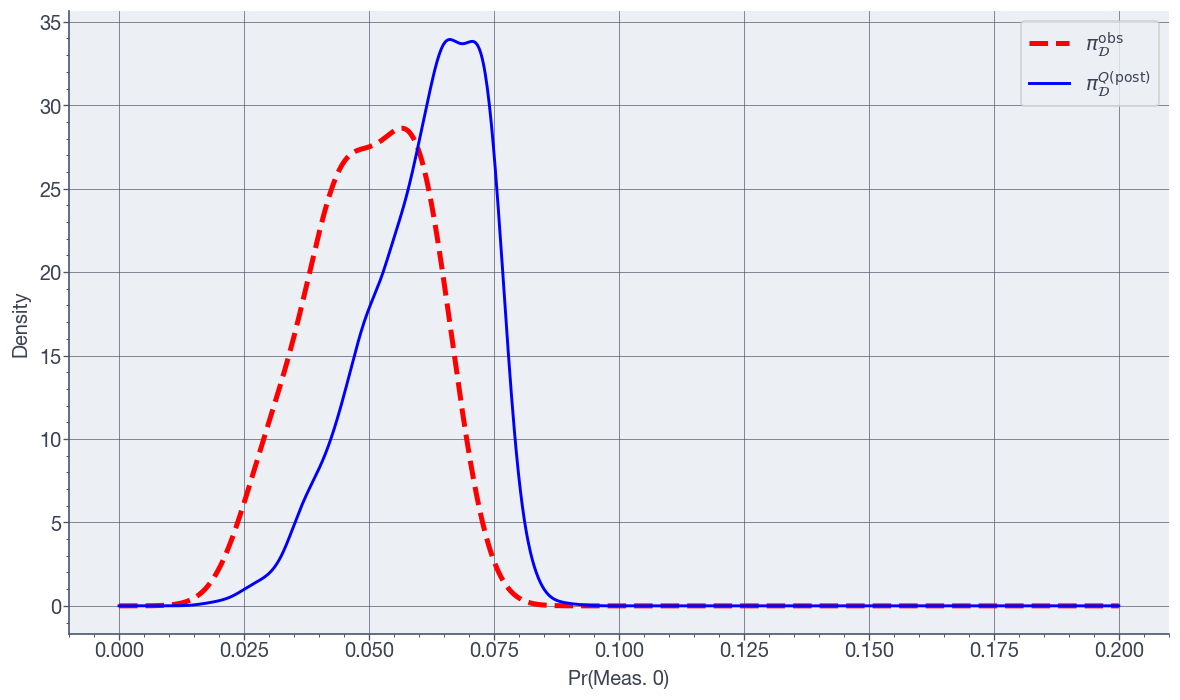

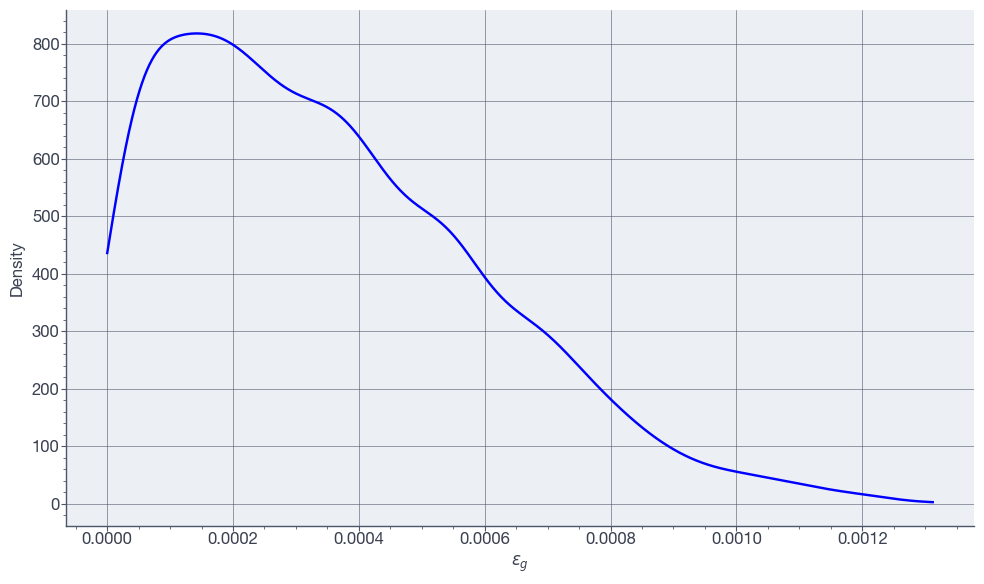

--- Inferring Gate Errors for Qubit 3 ---
-> Successfully injected informed measurement priors.


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


Final Accepted Posterior Lambdas
M: 1 Maximizer: 0.9 pi_obs = 0 pi_Q(prior) = 9.79707e-310
-> Inferred 2827 samples for QubitQubit3 (Single)
Accepted Number N: 2827, fraction 0.071
I(pi^post_Lambda) = 0.99974
Posterior Lambda Mean [9.82184563e-01 9.83108204e-01 5.94532122e-04]
Posterior Lambda Mode [9.79199730e-01 9.82737511e-01 1.70163483e-04]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.826854
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


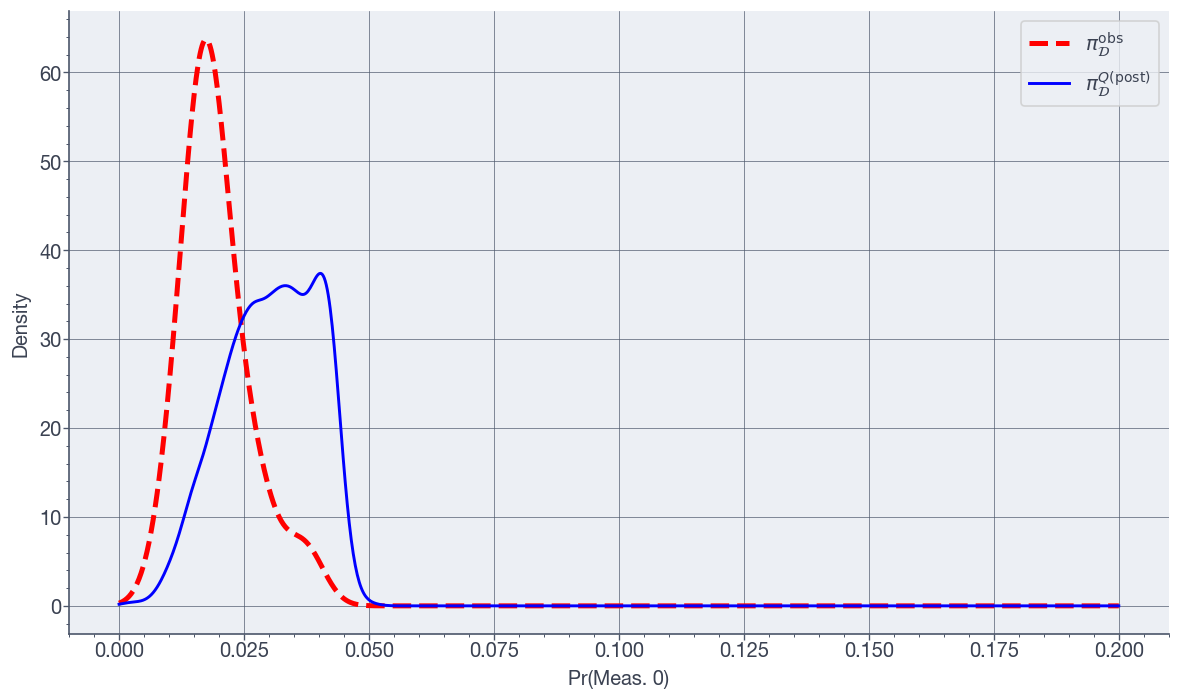

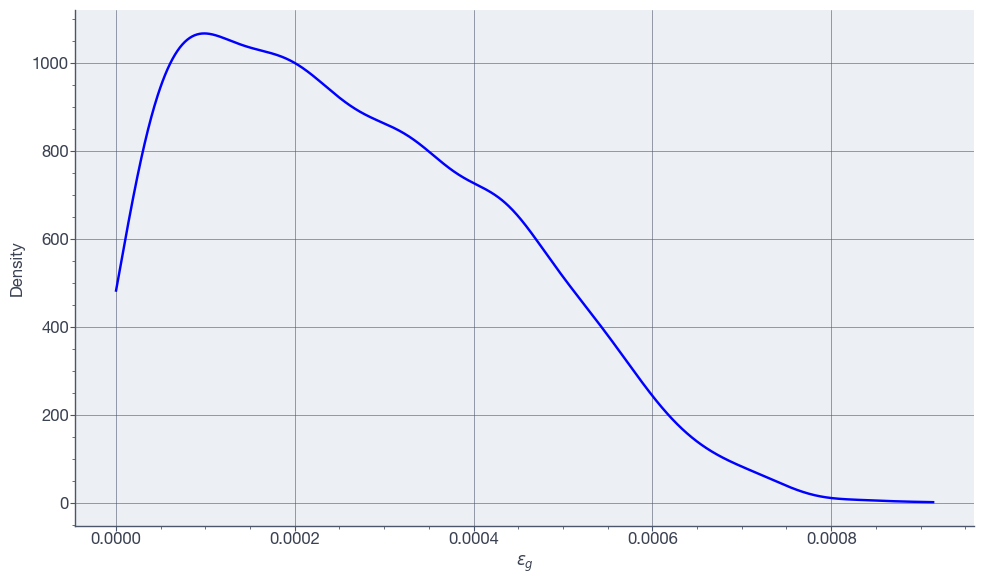

Saved Full Gate Posterior to:
gatedata/Post_Gate_Full_20260119_135425.json
and
gatedata/Post_Gate_Full_Current.json
Saved Mean/Mode Gate Summary to:
gatedata/Post_Gate_MeanMode_20260119_135425.json
and
gatedata/Post_Gate_MeanMode_Current.json


In [2]:
from src.splitgatefilter import SplitGateFilter
gate_filter = SplitGateFilter(home_dir = '.',meas_cal_dir='measdata', data_file_address='gatedata')

qubit_couplings = [{('1','2')},{('2','3')},{'1','3'}]
interested_circuits = ['Readout_27_RX_Circuit0.csv','Readout_27_RX_Circuit1.csv','Readout_27_RX_Circuit2.csv']

gate_filter.inference(qubit_order=[1,2,3],
                      qubit_couplings=qubit_couplings,
                      gate_type='RX',
                      gate_num=27,
                      num_points=16,
                      interested_circuits=interested_circuits,
                      nPrior=40000,
                      meas_sd=0.04,
                      gate_sd=0.01,
                      seed=191,
                      use_informed_priors=True,
                      plotting=True)

In [2]:
gate_filter.post

{'Qubit1': {'RX': {'Single': {'GATE_ERROR_MEAN': 0.0004247233113463439,
    'GATE_ERROR_MODE': 8.558471798175704e-06,
    'MEAS0_ERR_MEAN': 0.9816920325463483,
    'MEAS0_ERR_MODE': 0.9696837458539275,
    'MEAS1_ERR_MEAN': 0.9818089159602204,
    'MEAS1_ERR_MODE': 0.9675091824838651}}},
 'Qubit2': {'RX': {'Single': {'GATE_ERROR_MEAN': 0.0008765601085576423,
    'GATE_ERROR_MODE': 4.6763903418650665e-06,
    'MEAS0_ERR_MEAN': 0.9533469027835927,
    'MEAS0_ERR_MODE': 0.9198069787804957,
    'MEAS1_ERR_MEAN': 0.9555116008133472,
    'MEAS1_ERR_MODE': 0.9223639874441332}}},
 'Qubit3': {'RX': {'Single': {'GATE_ERROR_MEAN': 0.0006671208165459446,
    'GATE_ERROR_MODE': 1.2309099397020407e-05,
    'MEAS0_ERR_MEAN': 0.9807152980101044,
    'MEAS0_ERR_MODE': 1.0,
    'MEAS1_ERR_MEAN': 0.9836486739937793,
    'MEAS1_ERR_MODE': 0.9609076399084173}}}}